In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from scipy import stats
from scipy.stats import skew

In [579]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [580]:
#Dropping useless columns
del df['Unnamed: 0']

In [581]:
df = df[df['BUILDING CLASS CATEGORY'].str.contains("CONDO")]
df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.max)

,SALE PRICE
BUILDING CLASS CATEGORY,
04 TAX CLASS 1 CONDOS,999000
11 SPECIAL CONDO BILLING LOTS,600000
11A CONDO-RENTALS,999000
12 CONDOS - WALKUP APARTMENTS,999000
13 CONDOS - ELEVATOR APARTMENTS,999999
15 CONDOS - 2-10 UNIT RESIDENTIAL,999500
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,968500
17 CONDO COOPS,999900
28 COMMERCIAL CONDOS,900000


In [582]:
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("11")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("28")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("42")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("43")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("44")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("45")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("46")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("47")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("48")]
df = df[~df['BUILDING CLASS CATEGORY'].str.contains("49")]
df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.max)

,SALE PRICE
BUILDING CLASS CATEGORY,
04 TAX CLASS 1 CONDOS,999000
12 CONDOS - WALKUP APARTMENTS,999000
13 CONDOS - ELEVATOR APARTMENTS,999999
15 CONDOS - 2-10 UNIT RESIDENTIAL,999500
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,968500
17 CONDO COOPS,999900


In [583]:
#Check duplicates
sum(df.duplicated(df.columns))

129

In [584]:
#Remove duplicates
df = df.drop_duplicates(df.columns, keep='first')

In [585]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18020 entries, 76 to 84388
Data columns (total 21 columns):
BOROUGH                           18020 non-null int64
NEIGHBORHOOD                      18020 non-null object
BUILDING CLASS CATEGORY           18020 non-null object
TAX CLASS AT PRESENT              18020 non-null object
BLOCK                             18020 non-null int64
LOT                               18020 non-null int64
EASE-MENT                         18020 non-null object
BUILDING CLASS AT PRESENT         18020 non-null object
ADDRESS                           18020 non-null object
APARTMENT NUMBER                  18020 non-null object
ZIP CODE                          18020 non-null int64
RESIDENTIAL UNITS                 18020 non-null int64
COMMERCIAL UNITS                  18020 non-null int64
TOTAL UNITS                       18020 non-null int64
LAND SQUARE FEET                  18020 non-null object
GROSS SQUARE FEET                 18020 non-null object
Y

In [586]:
#Clean
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
#df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['ZIP CODE'] = df['ZIP CODE'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')

In [587]:
#check missing values
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [588]:
miss=df.isnull().sum()/len(df)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE           0.139900
GROSS SQUARE FEET    0.695671
LAND SQUARE FEET     0.695727
dtype: float64

In [589]:
del df['GROSS SQUARE FEET']
del df['LAND SQUARE FEET']

In [590]:
# Splitting dataset 
test=df[df['SALE PRICE'].isna()]
data=df[~df['SALE PRICE'].isna()]

In [591]:
test = test.drop(columns='SALE PRICE')

In [592]:
# Print first 5 rows of test
print(test.shape)
test.head()

(2521, 18)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE
77,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,398,1039,,R2,182 EAST 2ND STREET,6E,10009,1,0,1,0,2,R2,2017-02-24 00:00:00
78,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,405,1211,,R2,511 EAST 11TH STREET,C3,10009,1,0,1,0,2,R2,2017-07-20 00:00:00
82,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1006,,R4,324 EAST 4TH STREET,4B,10009,1,0,1,1920,2,R4,2016-11-03 00:00:00
83,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1007,,R4,324 EAST 4TH STREET,5A,10009,1,0,1,1920,2,R4,2016-11-03 00:00:00
84,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1008,,R4,324 EAST 4TH STREET,5B,10009,1,0,1,1920,2,R4,2016-11-03 00:00:00


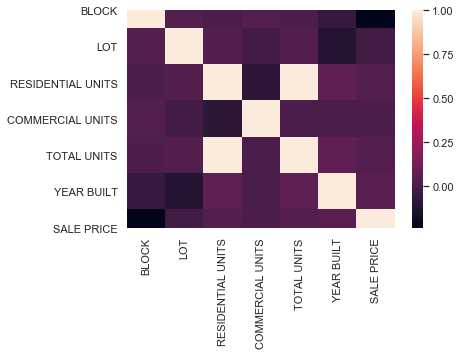

In [593]:
#correlation between the features
corr = data.corr()
sns.heatmap(corr)

In [594]:
#numeric correlation
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
YEAR BUILT           0.055752
TOTAL UNITS          0.038432
RESIDENTIAL UNITS    0.036856
COMMERCIAL UNITS     0.014820
LOT                 -0.014309
BLOCK               -0.234846
Name: SALE PRICE, dtype: float64

In [595]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,SALE PRICE
count,15499.000000,15499.000000,15499.000000,15499.000000,15499.000000,15499.000000,1.549900e+04
mean,2367.487902,1341.176592,0.893542,0.005033,0.898574,1521.269888,1.646294e+06
std,2445.769479,656.019516,0.732183,0.070764,0.729455,837.880970,3.146212e+06
min,1.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,839.000000,1033.000000,1.000000,0.000000,1.000000,1900.000000,4.866100e+05
50%,1438.000000,1135.000000,1.000000,0.000000,1.000000,1982.000000,8.650000e+05
75%,3072.000000,1338.000000,1.000000,0.000000,1.000000,2008.000000,1.648519e+06
max,16238.000000,9106.000000,72.000000,1.000000,72.000000,2016.000000,9.852570e+07


In [596]:
data=data[data['TOTAL UNITS']>0]
data=data[data['RESIDENTIAL UNITS']>0]
data['YEAR BUILT'][data['YEAR BUILT']==0]=1800
#data['YEAR BUILT'] = data['YEAR BUILT'] - 1800
del data['BLOCK']
del data['LOT']
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,SALE PRICE
count,13737.000000,13737.0,13737.000000,13737.000000,1.373700e+04
mean,1.008153,0.0,1.008153,1946.374973,1.675664e+06
std,0.699503,0.0,0.699503,81.714016,3.253942e+06
min,1.000000,0.0,1.000000,1800.000000,0.000000e+00
25%,1.000000,0.0,1.000000,1910.000000,4.800000e+05
50%,1.000000,0.0,1.000000,1987.000000,8.750000e+05
75%,1.000000,0.0,1.000000,2008.000000,1.675000e+06
max,72.000000,0.0,72.000000,2016.000000,9.852570e+07


In [597]:
del data['COMMERCIAL UNITS']
del data['RESIDENTIAL UNITS']
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,TOTAL UNITS,YEAR BUILT,SALE PRICE
count,13737.000000,13737.000000,1.373700e+04
mean,1.008153,1946.374973,1.675664e+06
std,0.699503,81.714016,3.253942e+06
min,1.000000,1800.000000,0.000000e+00
25%,1.000000,1910.000000,4.800000e+05
50%,1.000000,1987.000000,8.750000e+05
75%,1.000000,2008.000000,1.675000e+06
max,72.000000,2016.000000,9.852570e+07


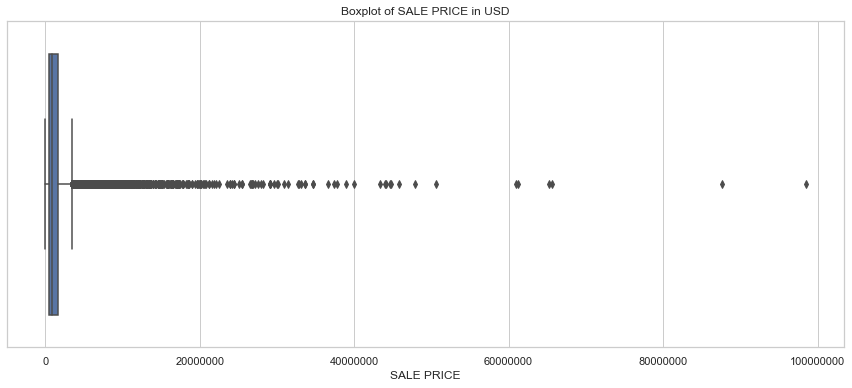

In [598]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

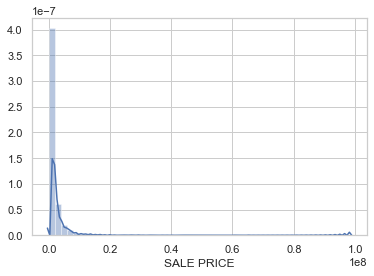

In [599]:
sns.distplot(data['SALE PRICE'])

In [600]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

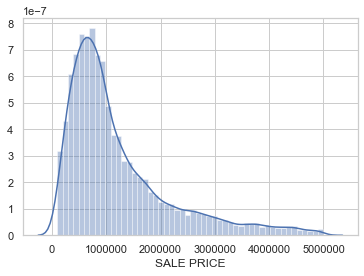

In [601]:
sns.distplot(data['SALE PRICE'])

In [602]:
data['SALE PRICE'].skew()

1.6053578192311273

-0.12415474219558018


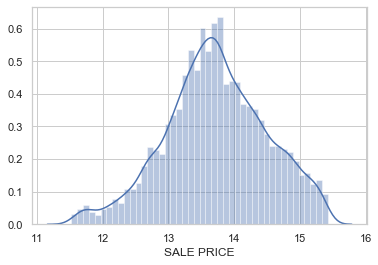

In [603]:
sales=np.log(data['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

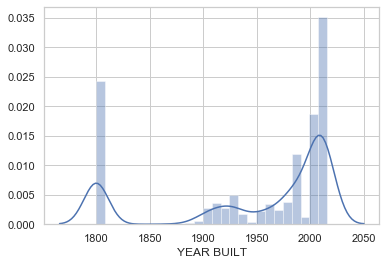

In [604]:
sns.distplot(data['YEAR BUILT'])

In [605]:
data[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
0,1,11700


In [606]:
del data['TOTAL UNITS']
cat_data=data.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE
count,11700,11700,11700,11700,11700,11700,11700,11700,11700,11700,11700,11700
unique,5,180,4,4,1,5,4629,2497,158,2,5,265
top,1,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,,R4,131-05 40TH ROAD,,11354,2,R4,2016-12-22 00:00:00
freq,4991,813,8924,9564,11700,8919,209,404,652,10497,8924,87


In [607]:
pivot=data.pivot_table(index='NEIGHBORHOOD', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
NEIGHBORHOOD,
AIRPORT LA GUARDIA,377000.0
ALPHABET CITY,1300000.0
ARDEN HEIGHTS,366750.0
ARROCHAR-SHORE ACRES,266000.0
ARVERNE,295648.0
...,...
WILLOWBROOK,420810.0
WINDSOR TERRACE,840000.0
WOODHAVEN,310000.0


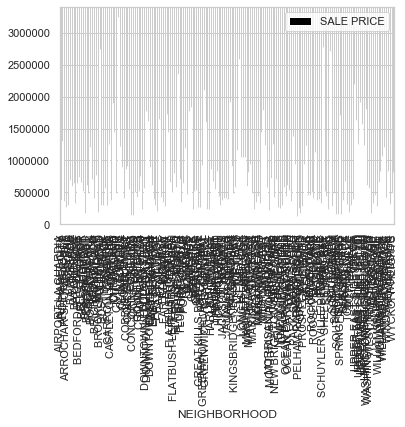

In [608]:
pivot.plot(kind='bar', color='black')

In [609]:
#  TAX CLASS AT TIME OF SALE
data['ZIP CODE'].unique()

[10009, 10002, 10011, 10001, 10014, ..., 10306, 10308, 10302, 10309, 10307]
Length: 158
Categories (158, int64): [10009, 10002, 10011, 10001, ..., 10308, 10302, 10309, 10307]

In [610]:
pivot=data.pivot_table(index='ZIP CODE', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
ZIP CODE,
0,2775000.0
10001,1900000.0
10002,999999.0
10003,1901835.5
10004,1230000.0
...,...
11435,410000.0
11691,290000.0
11692,295648.0


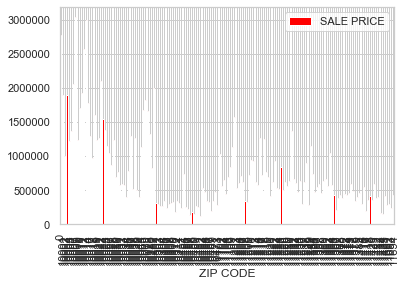

In [611]:
pivot.plot(kind='bar', color='red')

In [612]:
# BOROUGH
data['BOROUGH'].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]

In [613]:
pivot=data.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
BOROUGH,
1,1395000.0
2,176500.0
3,865000.0
4,573650.0
5,305000.0


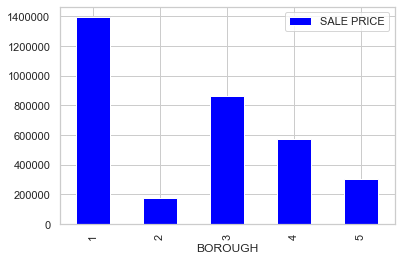

In [614]:
pivot.plot(kind='bar', color='blue')

In [615]:
# BUILDING CLASS CATEGORY
print(data['BUILDING CLASS CATEGORY'].nunique())

pivot=data.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot

4


,SALE PRICE
BUILDING CLASS CATEGORY,
04 TAX CLASS 1 CONDOS,420000.0
12 CONDOS - WALKUP APARTMENTS,528000.0
13 CONDOS - ELEVATOR APARTMENTS,999999.0
15 CONDOS - 2-10 UNIT RESIDENTIAL,830000.0


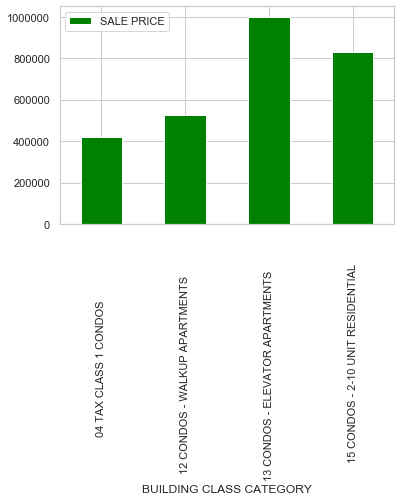

In [616]:
pivot.plot(kind='bar', color='Green')

In [617]:
del data['ADDRESS']
del data['APARTMENT NUMBER']
del df['BLOCK']
del df['LOT']
del df['EASE-MENT']

In [618]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 76 to 84388
Data columns (total 12 columns):
BOROUGH                           11700 non-null category
NEIGHBORHOOD                      11700 non-null object
BUILDING CLASS CATEGORY           11700 non-null object
TAX CLASS AT PRESENT              11700 non-null object
EASE-MENT                         11700 non-null object
BUILDING CLASS AT PRESENT         11700 non-null object
ZIP CODE                          11700 non-null category
YEAR BUILT                        11700 non-null int64
TAX CLASS AT TIME OF SALE         11700 non-null category
BUILDING CLASS AT TIME OF SALE    11700 non-null object
SALE PRICE                        11700 non-null float64
SALE DATE                         11700 non-null object
dtypes: category(3), float64(1), int64(1), object(7)
memory usage: 966.3+ KB


In [619]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.columns

Index(['YEAR BUILT', 'SALE PRICE'], dtype='object')

In [620]:
#transform the numeric features using log(x + 1)
skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

In [621]:

scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       data[col] = scaled[:,i]

In [622]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,,R2,10009,-1.831103,2,R2,-0.498391,2016-12-30 00:00:00
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,,R4,10009,-0.345159,2,R4,-0.230401,2016-09-21 00:00:00
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,,R4,10009,-0.345159,2,R4,-0.213240,2016-09-12 00:00:00
81,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,,R4,10009,-0.345159,2,R4,0.164544,2016-11-03 00:00:00
85,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,,R4,10009,-0.345159,2,R4,-0.168565,2016-09-07 00:00:00


In [623]:
del data['TAX CLASS AT PRESENT']
del data['EASE-MENT']
del data['BUILDING CLASS AT PRESENT']
del data['TAX CLASS AT TIME OF SALE']
del data['BUILDING CLASS AT TIME OF SALE']
del data['SALE DATE']
del data['ZIP CODE']

In [624]:
#Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','NEIGHBORHOOD']

In [625]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 76 to 84388
Data columns (total 189 columns):
BOROUGH_1                                                              11700 non-null uint8
BOROUGH_2                                                              11700 non-null uint8
BOROUGH_3                                                              11700 non-null uint8
BOROUGH_4                                                              11700 non-null uint8
BOROUGH_5                                                              11700 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                          11700 non-null uint8
BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS                  11700 non-null uint8
BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS                11700 non-null uint8
BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL              11700 non-null uint8
NEIGHBORHOOD_AIRPORT LA GUARDIA                              

In [626]:
# Replacing categorical columns with dummies
fdf = data.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [627]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 76 to 84388
Columns: 191 entries, YEAR BUILT to NEIGHBORHOOD_WYCKOFF HEIGHTS
dtypes: float64(2), uint8(189)
memory usage: 2.4 MB


In [628]:
Y_fdf = fdf['SALE PRICE']
X_fdf = fdf.drop('SALE PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((11700, 190), (11700,))

In [629]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.3 , random_state =34)

In [630]:
# Training set
X_train.shape , Y_train.shape

((8190, 190), (8190,))

In [631]:
#Testing set
X_test.shape , Y_test.shape

((3510, 190), (3510,))

In [632]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [633]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, Y_train)
Y_pred_lin = linreg.predict(X_test)


# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(Y_pred_lin - Y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / Y_test)), 2)
accuracy = 100 - mape
print('R-squared: ', round(r2_score(Y_test, Y_pred_lin), 2))
print('RMSE: ', rmse(Y_test,Y_pred_lin))

R-squared:  -3.1350217041156956e+26
RMSE:  17482542322660.059


In [634]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso=lasso_regr.predict(X_test)

errors = abs(Y_pred_lasso - Y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / Y_test)), 2)
accuracy = 100 - mape
print('R-squared: ', round(r2_score(Y_test, Y_pred_lasso), 2))
print('RMSE: ', rmse(Y_test,Y_pred_lasso))


R-squared:  0.62
RMSE:  0.6114170200412089


In [635]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)


errors = abs(Y_pred_rf - Y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / Y_test)), 2)
accuracy = 100 - mape
print('R-squared: ', round(r2_score(Y_test, Y_pred_rf), 2))
print('RMSE: ', rmse(Y_test,Y_pred_rf))

R-squared:  0.72
RMSE:  0.5197535948883552


**We can see that Random Forest Regressor has highest R-squared and least RSME score

In [636]:
X_test

,YEAR BUILT,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,...,NEIGHBORHOOD_WILLIAMSBRIDGE,NEIGHBORHOOD_WILLIAMSBURG-CENTRAL,NEIGHBORHOOD_WILLIAMSBURG-EAST,NEIGHBORHOOD_WILLIAMSBURG-NORTH,NEIGHBORHOOD_WILLIAMSBURG-SOUTH,NEIGHBORHOOD_WILLOWBROOK,NEIGHBORHOOD_WINDSOR TERRACE,NEIGHBORHOOD_WOODHAVEN,NEIGHBORHOOD_WOODSIDE,NEIGHBORHOOD_WYCKOFF HEIGHTS
4473,-0.592816,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9401,0.385430,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5269,0.769299,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5931,0.695002,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33441,-0.221330,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33365,-0.196565,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1293,0.769299,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
66444,0.818830,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9142,-0.270862,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [637]:
Y_pred_rf

array([-0.15011175,  0.65363998,  0.48649975, ...,  0.28757766,
        0.82225629,  1.41702329])